# TMDb Movie Success Prediction
Predicting whether a movie is financially successful using metadata and machine learning models (Logistic Regression and KNN).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## 1.Load and merge datasets

In [7]:
# Load datasets
movies_df = pd.read_csv('C:/Users/MEHR GOSTAR/OneDrive/Desktop/git projects/dataset tmbd-movies-analysis/datasets/tmdb_5000_movies.csv')
credits_df = pd.read_csv('C:/Users/MEHR GOSTAR/OneDrive/Desktop/git projects/dataset tmbd-movies-analysis/datasets/tmdb_5000_credits.csv')
# Merge datasets
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)
data_frame = movies_df.merge(credits_df, on='id')

## 2. Load and Prepare Data

In [8]:
data_frame = data_frame[(data_frame['budget'] > 0) & (data_frame['revenue'] > 0)]
data_frame['is_successful'] = (data_frame['revenue'] > data_frame['budget']).astype(int)

## 3. Extract Main Genre


In [9]:
data_frame['genres'] = data_frame['genres'].apply(ast.literal_eval)
data_frame['genre_main'] = data_frame['genres'].apply(lambda x: x[0]['name'] if len(x) > 0 else 'Unknown')

## 4. Feature Engineering

In [10]:
X = data_frame[['budget', 'popularity', 'runtime', 'genre_main']]
y = data_frame['is_successful']
X = pd.get_dummies(X, columns=['genre_main'], drop_first=True)
X['runtime'] = X['runtime'].fillna(X['runtime'].median())

## 5. Train/Test Split and Scaling


In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 6. Logistic Regression Model


In [12]:

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Results:\\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:\n
              precision    recall  f1-score   support

           0       0.64      0.30      0.41       157
           1       0.81      0.95      0.87       489

    accuracy                           0.79       646
   macro avg       0.73      0.62      0.64       646
weighted avg       0.77      0.79      0.76       646



## 7. K-Nearest Neighbors (KNN) Model

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Results:\\n")
print(classification_report(y_test, y_pred_knn))

KNN Results:\n
              precision    recall  f1-score   support

           0       0.54      0.34      0.42       157
           1       0.81      0.91      0.86       489

    accuracy                           0.77       646
   macro avg       0.68      0.62      0.64       646
weighted avg       0.75      0.77      0.75       646



## 8. Confusion Matrix for KNN

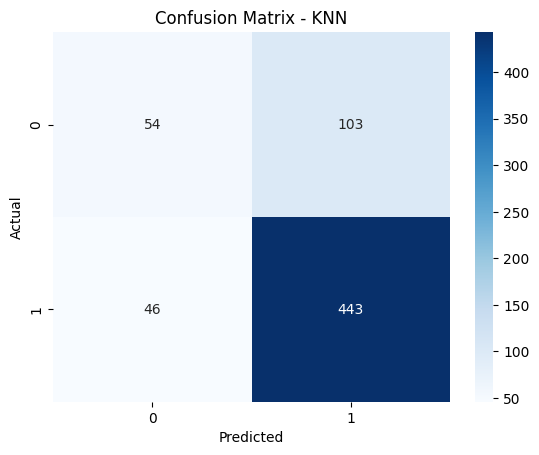

In [14]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()